<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Practicing K-Means:  Isotopic Composition Plutonium Batches

_Authors: Dave Yerrington (SF)_


---

We have a nice [data dictionary](https://vincentarelbundock.github.io/Rdatasets/doc/cluster/pluton.html)

    Pu238 : the percentages of (238)Pu, always less than 2 percent.

    Pu239 : the percentages of (239)Pu, typically between 60 and 80 percent (from neutron capture of Uranium, (238)U).

    Pu240 : percentage of the plutonium 240 isotope.

    Pu241 : percentage of the plutonium 241 isotope.
    
This is supplemental practice you can finish to get more familliar with K-Means (ie: not required).  This data is fairly odd and you will see that K-Means may not be ideal in a certain respect but the takeaway is that it can do an ok job with whispy, elongated shapes.  A more ideal model would be DBSCAN or a hierachical clustering model.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [41]:
csv_file = "https://vincentarelbundock.github.io/Rdatasets/csv/cluster/pluton.csv"

df = pd.read_csv(csv_file)
df.head()

,Unnamed: 0,Pu238,Pu239,Pu240,Pu241
0,1,0.126,75.804,21.204,2.180
1,2,0.133,75.515,21.408,2.240
2,3,0.127,75.175,21.668,2.305
3,4,0.156,78.872,18.428,1.906
4,5,0.503,73.317,20.223,4.128


###  Use Pu239 and Pu240 as our features.
1. Select only columns "Pu239" and "Pu240" to use for our example.
1. Plot "Pu239" and "Pu240" for visual reference.


In [42]:
# A:
X = df[['Pu239', 'Pu240']]

### Next, use K-Means to cluster this data using "Pu239" and "Pu240" features
Initialize an instance of `KMeans` from `sklearn`, initialized for K=3 clusters.  Fit our sliced dataframe with the `fit`.

In [73]:
# Import Libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [74]:
# A:
km = KMeans(n_clusters=3, random_state=42)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

### Assign clusters assignments (predictions) back to the original dataframe

In [77]:
# A: 
df['label'] = km.predict(X)
df.head()

,Unnamed: 0,Pu238,Pu239,Pu240,Pu241,label,label_sc
0,1,0.126,75.804,21.204,2.180,2,0
1,2,0.133,75.515,21.408,2.240,2,0
2,3,0.127,75.175,21.668,2.305,2,0
3,4,0.156,78.872,18.428,1.906,2,2
4,5,0.503,73.317,20.223,4.128,1,0


### Reference the coordinates for the centroids, plot with your "Pu239" and "Pu240" scatter plot
Plot the centroids from the model object with the scatter of "Pu239" and "Pu240".

In [78]:
# Find centroids
centroids = df.groupby('label')['Pu239','Pu240'].mean()
centroids

,Pu239,Pu240
label,,
0,60.633933,24.387533
1,71.573167,19.973917
2,76.593000,20.194833


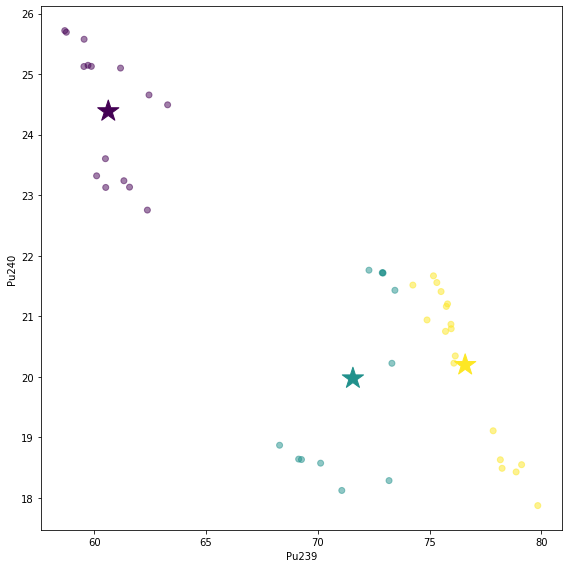

In [79]:
#Plot
plt.figure(figsize=(8, 8))
plt.scatter(df['Pu239'], df['Pu240'], alpha=0.5, c=df['label'])
plt.scatter(centroids['Pu239'], centroids['Pu240'], c=centroids.index, marker="*", s=500)
plt.xlabel("Pu239")
plt.ylabel("Pu240")
plt.tight_layout()
plt.show();

### Scale your data, rerun your model, then plot.
This should help slightly but you should compare before and after.

In [80]:
# Scale X
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# Fit Model
km.fit(X_sc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [81]:
df['label_sc'] = km.predict(X_sc)
df.head()

,Unnamed: 0,Pu238,Pu239,Pu240,Pu241,label,label_sc
0,1,0.126,75.804,21.204,2.180,2,2
1,2,0.133,75.515,21.408,2.240,2,2
2,3,0.127,75.175,21.668,2.305,2,2
3,4,0.156,78.872,18.428,1.906,2,1
4,5,0.503,73.317,20.223,4.128,1,2


In [82]:
# Find centroids
centroids_sc = df.groupby('label')['Pu239','Pu240'].mean()
centroids_sc

,Pu239,Pu240
label,,
0,60.633933,24.387533
1,71.573167,19.973917
2,76.593000,20.194833


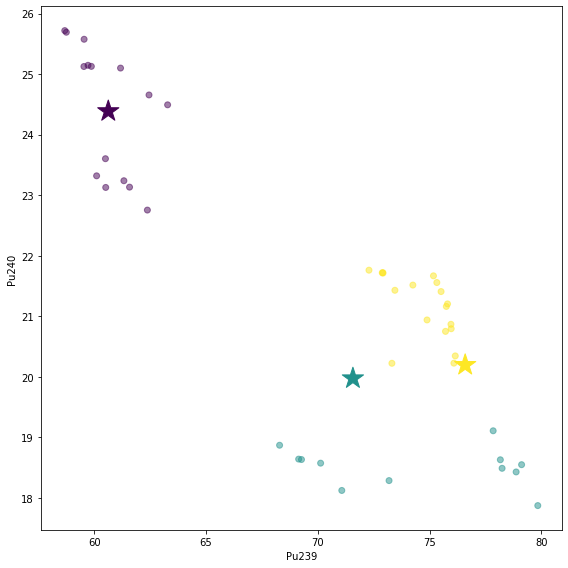

In [83]:
#Plot
plt.figure(figsize=(8, 8))
plt.scatter(df['Pu239'], df['Pu240'], alpha=0.5, c=df['label_sc'])
plt.scatter(centroids_sc['Pu239'], centroids_sc['Pu240'], c=centroids_sc.index, marker="*", s=500)
plt.xlabel("Pu239")
plt.ylabel("Pu240")
plt.tight_layout()
plt.show();

### Might as well check that silhouette score
Just to confirm what your eyes are telling you.

In [84]:
from sklearn.metrics import silhouette_score
print(f'Silhouette score without scaling: {silhouette_score(X, df["label"])}')
print(f'Silhouette score without scaling: {silhouette_score(X, df["label_sc"])}')

Silhouette score without scaling: 0.5950619279181214
Silhouette score without scaling: 0.5342202492727395
